In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

from scipy.stats import multivariate_normal

from IPython.display import display

# Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

### 1.

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! 
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был 
невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

# Ответ:
Прокурор оценил вероятность того что кровь любого человека принадлежит редкой $P(А)$ и любой другой $P(B)$ группе.

$P(А) = 0.01$

$P(B) = 1 - P(A) = 0.99$


При этом если допустить, что подсудимый является случайным человеком из города. Вероятность того что он убийца:

$P(H) = \frac{1}{N_{rare}}$, где $N_{rare}$ - число  людей с редкой группой крови, $N_{rare} = N * P(A)$, где $N$ - общее число житилей. 

### 2.
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

# Ответ:
Адвокат делает гипотезу, о том, что подсудимый является случайно выбраным человеком из города, но это не так.

Адвокат должен был посчитать вероятность, что среди подозреваемых есть убийца $P(H|sus)$, тогда общая вероятность причастности человека равнялась бы:

$P(H) = \frac{P(H|sus)}{N_{rareSuspect}}$,где $N_{rareSuspect}$ - число подозреваемых с редкой группой крови

$P(H|sus)$ в свою очередь сложная вероятность состоящая из многих факторов, есть ли у человека алиби, были ли у подозреваемого мотивы, имеется ли у подозреваемого ДНК потерпевшего и т.д.

### 3.
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в
   виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

# Ответ:
$P(A)$ - вероятность болезни

$P(\overline A)$ - вероятность здорового человека

$P(H|A)$ - тест положительный и человек болеет (True positive)

$P(\overline{H}|A)$ - тест отрицательный и человек болеет (False negative)

$P(H|\overline{A})$ - тест положительный человек не болеет (False positive)

$P(\overline{H}|\overline{A})$ - тест отрицательный человек не болеет (True negative)

$P(A|H)$ - вероятность болезни при положительном тесте

$P(A|H)$ = $\frac{P(H|A)\cdot P(A)}{P(H|A)\cdot P(A) + P(H|\overline A) \cdot P(\overline A)}$

$P(A|\overline H)$ - вероятность болезни при отрицательном тесте

$P(A|\overline H)$ = $\frac{P(\overline{H}|A) \cdot P(A)}{P(\overline{H}|A) \cdot P(A) + P(\overline{H}| \overline A) \cdot P(\overline A)}$

In [2]:
p_a = 0.01


def precision(false_positive=0.05, false_negative=0.05):
    return (1 - false_negative) * p_a / ((1 - false_negative) * p_a + false_positive * (1 - p_a))

def omission(false_positive=0.05, false_negative=0.05):
    return false_negative *  p_a / (false_negative * p_a + (1 - false_positive) * (1 - p_a))

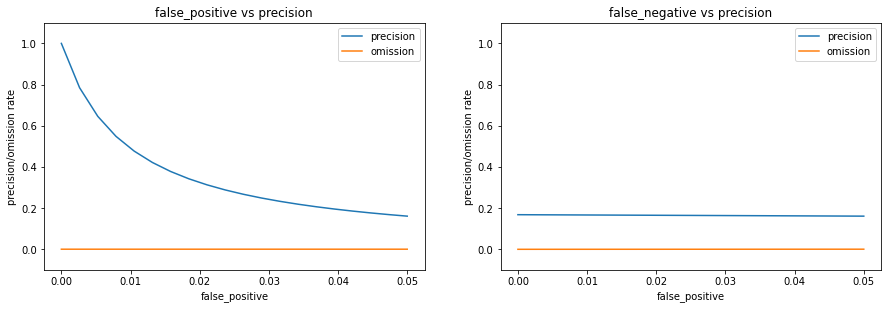

In [3]:
plt.figure(figsize=(15, 10))


plt.subplot(221)
plt.ylim(-0.1, 1.1)
x = np.linspace(0.05, 0, 20)
plt.plot(x, precision(false_positive=x), label='precision')
plt.plot(x, omission(false_positive=x), label='omission')
plt.ylabel('precision/omission rate')
plt.xlabel('false_positive')
plt.title('false_positive vs precision')
plt.legend();

plt.subplot(222)
plt.ylim(-0.1, 1.1)
plt.plot(x, precision(false_negative=x), label='precision')
plt.plot(x, omission(false_negative=x), label='omission')
plt.ylabel('precision/omission rate')
plt.xlabel('false_positive')
plt.title('false_negative vs precision')
plt.legend();

При малом проценте людей болеющих новой болезнью $P(A)$.

При уменьшении ошибок первого и второго рода, вероятость пропуска болезни убывает гораздо медленне, чем возрастает точность диагноза.

Но при этом, скорость роста точности при уменьшении False_positive гораздо быстрее.
Таким образом, следует уменьшать False positive и следить за показателемя $P(A)$. 

# Часть II: О линейной регрессии

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

https://ourworldindata.org/coronavirus-source-data

### 1. 
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [4]:
data_path = 'data/owid-covid-data.csv'
data_df = pd.read_csv(data_path)

In [5]:
rus_df = data_df[(data_df['iso_code'] == 'RUS') & (data_df['date'] >= '2020-03-03')][['date', 'new_cases', 'total_cases']]
rus_df['new_cases'] = rus_df['new_cases'].replace(0, 1)
rus_df = rus_df.reset_index(drop=True)

rus_df['day'] = rus_df.index
X_train, X_test = rus_df[:50][['day']], rus_df[50:][['day']]
y_new_train = rus_df[:50]['new_cases']
y_total_train = rus_df[:50]['total_cases']
y_new_test = rus_df[50:]['new_cases']
y_total_test = rus_df[50:]['total_cases']

### 2.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

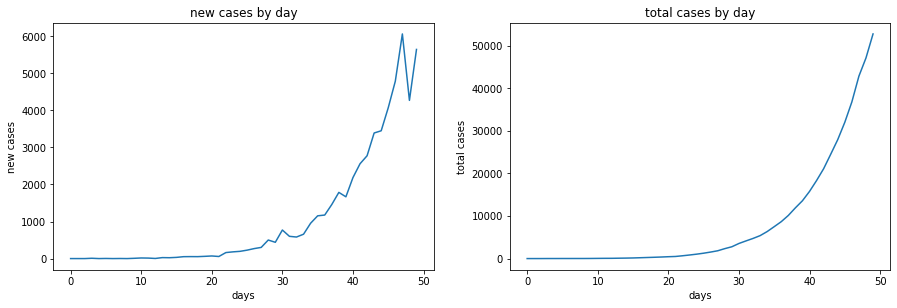

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(X_train, y_new_train)
plt.ylabel('new cases')
plt.xlabel('days')
plt.title('new cases by day')

plt.subplot(222)
plt.plot(X_train, y_total_train)
plt.ylabel('total cases')
plt.xlabel('days')
plt.title('total cases by day');

### 2.a.
Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших:

​y ~ exp(линейная функция от x),​где x — номер текущего дня.

Далее будем строить модель от total_cases

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, np.log(y_total_train))
print(f'model weights: {lin_reg.intercept_:.4f}, {lin_reg.coef_[0]:.4f}')

model weights: 1.8207, 0.1983


### 2.b.
Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [8]:
sigma_0 = 2
model_noise = mean_squared_error(lin_reg.predict(X_train[['day']]), np.log(y_total_train))

In [9]:
X = X_train.copy()
X['day_0'] = 1
X = X[['day_0', 'day']]

sigma = np.linalg.inv(np.eye(2) / sigma_0 + (X.T.dot(X)) / model_noise)
mu = sigma.dot((X.T.dot(np.log(y_total_train))) / model_noise)

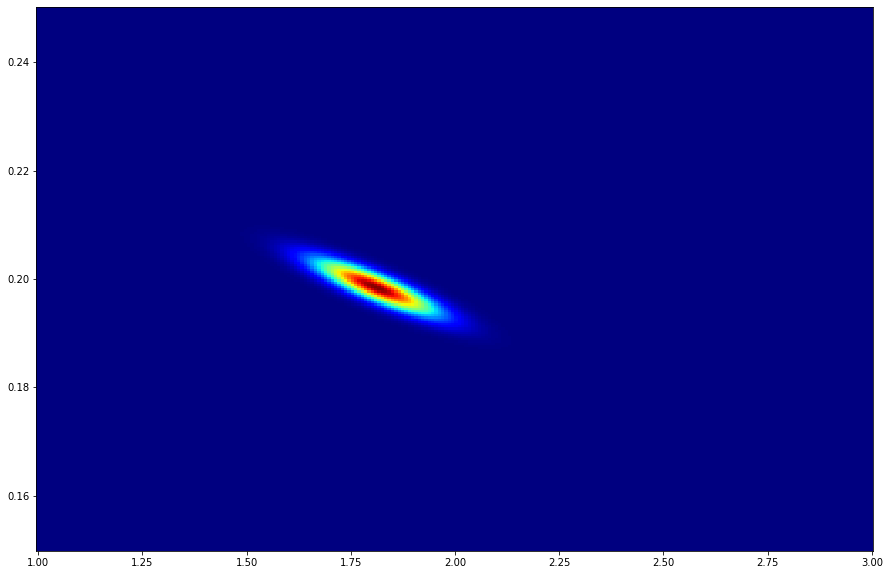

In [10]:
N = 250
X = np.linspace(1, 3, N)
Y = np.linspace(0.15, 0.25, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=mu, cov=sigma)

plt.figure(figsize=(15, 10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto');

### 2.c.
Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [11]:
def model_predict(w, X):
    return np.exp(w[0] + w[1] * X)
    
def myplot_sample_lines(mu, sigma, n=100, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu, sigma, n)

    may_1st = rus_df[rus_df['date'] == '2020-05-01']['day'].values[0]
    june_1st = rus_df[rus_df['date'] == '2020-06-01']['day'].values[0]
    sept_1st = rus_df[rus_df['date'] == '2020-09-01']['day'].values[0]
    
    plt.figure(figsize=(10, 8))
    plt.ylim(0, 0.1e6)
    plt.xlim(0, 50)  # train period
    pred = []
    for w in my_w:
        pred.append((model_predict(w, may_1st),
                    model_predict(w, june_1st),
                    model_predict(w, sept_1st)
                   ))
        plt.plot(X_train[['day']], model_predict(w, X_train[['day']]), 'k-', lw=.4)
    
    plt.plot(X_train[['day']], y_total_train, 'red', lw=2)
    stat_df = pd.DataFrame(rus_df.iloc[[may_1st, june_1st, sept_1st]]['total_cases'].values
                           ,columns=['real_values']
                           ,index=['1st May', '1st June', '1st Sept']
                          )
    stat_df['pred_mean'] = np.mean(pred, axis=0)
    stat_df['pred_std'] = np.std(pred, axis=0)
    stat_df['quant_10'] = np.quantile(pred, 0.1, axis=0)
    stat_df['quant_90'] = np.quantile(pred, 0.9, axis=0)
    stat_df = stat_df.astype(int)
    display(stat_df)


,real_values,pred_mean,pred_std,quant_10,quant_90
1st May,114431,759349,104920,647364,909466
1st June,414328,365418959,91328876,271669680,492724773
1st Sept,997072,35930959925860240,22645517354060508,14908703398468804,63688057197800504


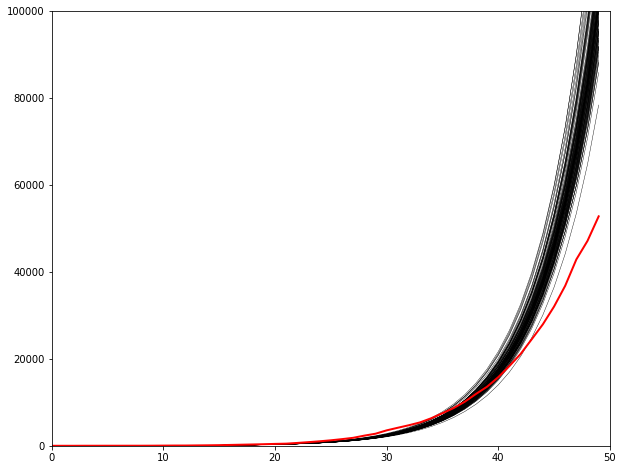

In [12]:
myplot_sample_lines(mu, sigma, n=100)

### 3.
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. 

Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:

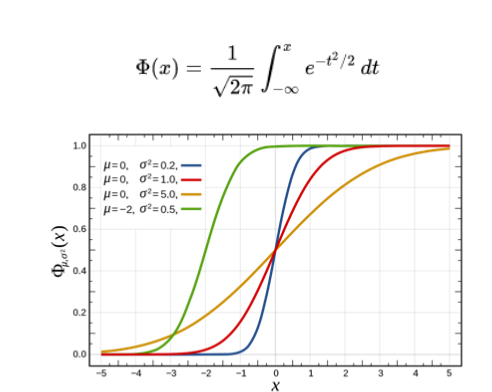

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t​.​

### 3.a.
Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

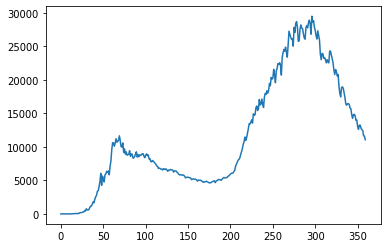

In [13]:
plt.plot(rus_df['day'], rus_df['new_cases']);

С помощью полиномиальных признаков линейной моделью можно выучить квадратичную зависимость в виде колокола.
Распределение новых случаев выглядит схожим образом, только имеет бимодальную структуру.
Такой моделью можно выучить зависимость new daily cases.
Если использовать кумулятивную сумму новых случаев заражения как раз получим зависимость в виде сигмоиды.

### 3.b.
Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [14]:
X_train['day_2'] = X_train['day'] ** 2
X_test['day_2'] = X_test['day'] ** 2

In [15]:
lin_sig_model = LinearRegression()
lin_sig_model.fit(X_train, np.log(y_new_train))

LinearRegression()

In [16]:
def sigmoid_model_predict(model, X):
    return np.cumsum(np.exp(model.predict(X)))

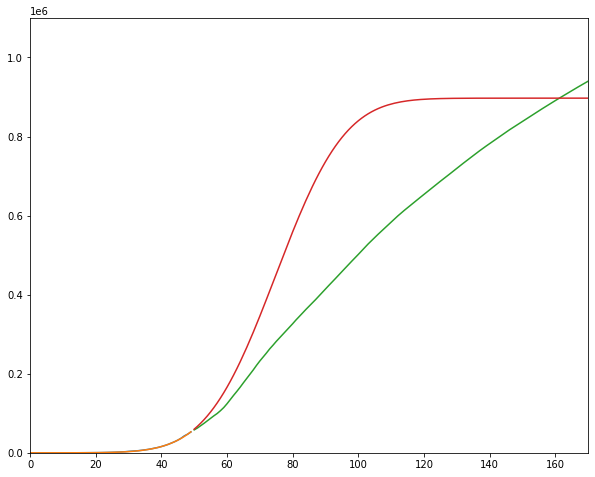

In [17]:
plt.figure(figsize=(10, 8))
plt.ylim(0, 1.1e6)
plt.xlim(0, 170)

# train part
plt.plot(X_train['day'], y_total_train)
y_train_pred = sigmoid_model_predict(lin_sig_model, X_train)
plt.plot(X_train['day'], y_train_pred)

# test part
train_cum_sum = y_train_pred[-1]
y_test_pred = train_cum_sum + sigmoid_model_predict(lin_sig_model, X_test)

plt.plot(X_test['day'], y_total_test)
plt.plot(X_test['day'], y_test_pred);

### 3.c.
Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [18]:
model_noise = mean_squared_error(lin_sig_model.predict(X_train), np.log(y_new_train))
sigma_0 = 2

In [19]:
X = X_train[['day', 'day_2']].copy()
X['day_0'] = 1
X = X[['day_0', 'day', 'day_2']]

sigma = np.linalg.inv(np.eye(3) / sigma_0 + (X.T.dot(X)) / model_noise)
mu = sigma.dot((X.T.dot(np.asarray(np.log(y_new_train)))) / model_noise)

In [20]:
def myplot_sample_sigmoids(mu, sigma, n=10):
    # Посэмплируем и порисуем прямые
    
    my_w = np.random.multivariate_normal(mu, sigma, n)

    may_1st = rus_df[rus_df['date'] == '2020-05-01']['day'].values[0]
    june_1st = rus_df[rus_df['date'] == '2020-06-01']['day'].values[0]
    sept_1st = rus_df[rus_df['date'] == '2020-09-01']['day'].values[0]
    
    X = pd.concat([X_train, X_test])  # train and test period
    
    plt.figure(figsize=(10, 8))    
    plt.ylim(0, 1.1e6)
    plt.xlim(0, 180)  # first 180 days
    
    model = LinearRegression()
    pred = []
    for w in my_w:
        model.intercept_ = w[0]
        model.coef_ = w[1:]
        
        y_pred = sigmoid_model_predict(model, X)
        pred.append((y_pred[may_1st], y_pred[june_1st], y_pred[sept_1st]))
        
        plt.plot(X['day'], y_pred, 'k-', lw=.4)
        
    plt.plot(X_train['day'], y_total_train, 'red', lw=2)
    plt.plot(X_test['day'], y_total_test, 'red', lw=2)
    
    stat_df = pd.DataFrame(rus_df.iloc[[may_1st, june_1st, sept_1st]]['total_cases'].values
                           ,columns=['real_values']
                           ,index=['1st May', '1st June', '1st Sept']
                          )
    stat_df['pred_mean'] = np.mean(pred, axis=0)
    stat_df['pred_std'] = np.std(pred, axis=0)
    stat_df['quant_10'] = np.quantile(pred, 0.1, axis=0)
    stat_df['quant_90'] = np.quantile(pred, 0.9, axis=0)
    stat_df = stat_df.astype(int)
    display(stat_df)

,real_values,pred_mean,pred_std,quant_10,quant_90
1st May,114431,158818,35769,117539,216617
1st June,414328,1018345,856384,359925,1983097
1st Sept,997072,2004849,4446010,390408,3621487


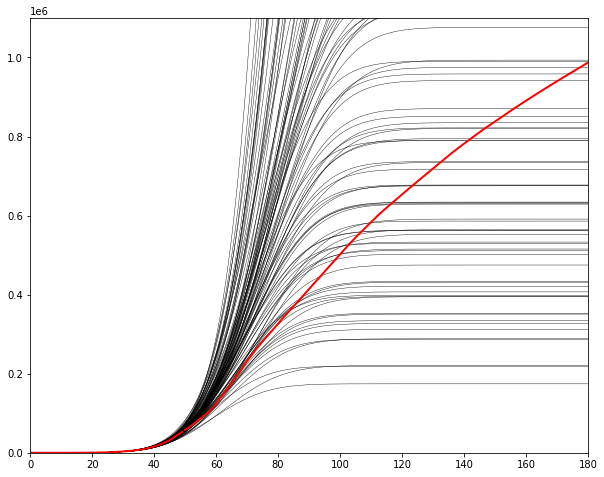

In [21]:
myplot_sample_sigmoids(mu, sigma, n=100)

### 4.
Бонус:

проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

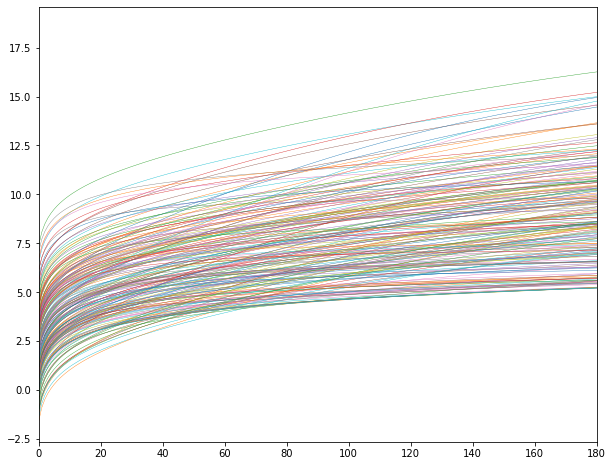

In [22]:
MIN_CASES_FOR_START = 3
TRAIN_DAYS = 50

    
plt.figure(figsize=(10, 8))    
# plt.ylim(0, 1e4)
plt.xlim(0, 180)  # first 180 days

w_0 = []
w_1 = []
w_2 = []
for country in data_df['iso_code'].unique():
    df = data_df[data_df['iso_code'] == country][['date', 'new_cases', 'total_cases']].copy()
    df['new_cases'] = df['new_cases'].fillna(1).clip(1)
    
    if df[df['new_cases'] >= MIN_CASES_FOR_START].empty:
        continue
    
    start_date = df[df['new_cases'] >= MIN_CASES_FOR_START].iloc[0]['date']
    df = df[df['date'] >= start_date].reset_index(drop=True)
    df['day'] = df.index
    df['day_2'] = df['day'] ** 2
    
    X = df[['day', 'day_2']]
    y = df['new_cases']
    
    model = LinearRegression()
    model.fit(X, np.log(y))
    
    y_pred = sigmoid_model_predict(model, X)
    plt.plot(X['day'], np.log(y_pred), lw=.4)
    w_0.append(model.intercept_)
    w_1.append(model.coef_[0])
    w_2.append(model.coef_[1])



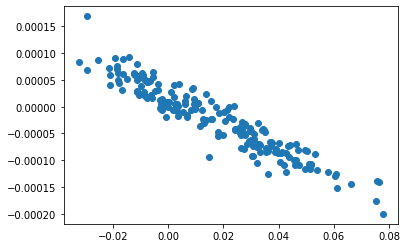

In [23]:
plt.scatter(w_1, w_2);

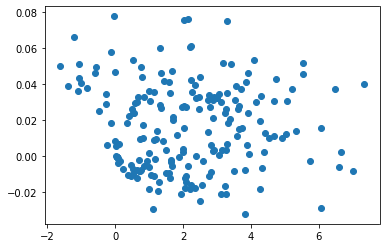

In [24]:
plt.scatter(w_0, w_1);

На последнем графике видны несколько явно выраженных кластеров, это страны в которых небольшое общее число больных.
Наличие кластерной структуры обьясняется тем, что во многих странах пандемия проходила по схожим сценариям

### 5.
[​Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете​]
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?